In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Downloading Data

_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

In [3]:
import os

In [4]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
val_data = os.path.join(base_dir, 'validation')

In [5]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
val_cats_dir = os.path.join(val_data, 'cats')
val_dogs_dir = os.path.join(val_data, 'dogs')

In [6]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(val_cats_dir))
num_dogs_val = len(os.listdir(val_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [7]:
# Setting Model Params

BATCH_SIZE = 100
IMG_SHAPE = 150
EPOCHS = 100

DATA AUGMENTATION 
1. Flipping
2. Rotation
3. Zooming

In [8]:
# Plotting the image in form of grid 

def PlotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize = (20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [9]:
# 1. Flipping Horizontally

image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
train_data_gen = image_gen.flow_from_directory(batch_size = BATCH_SIZE, directory = train_dir, shuffle = True, target_size = (IMG_SHAPE, IMG_SHAPE))

Found 2000 images belonging to 2 classes.


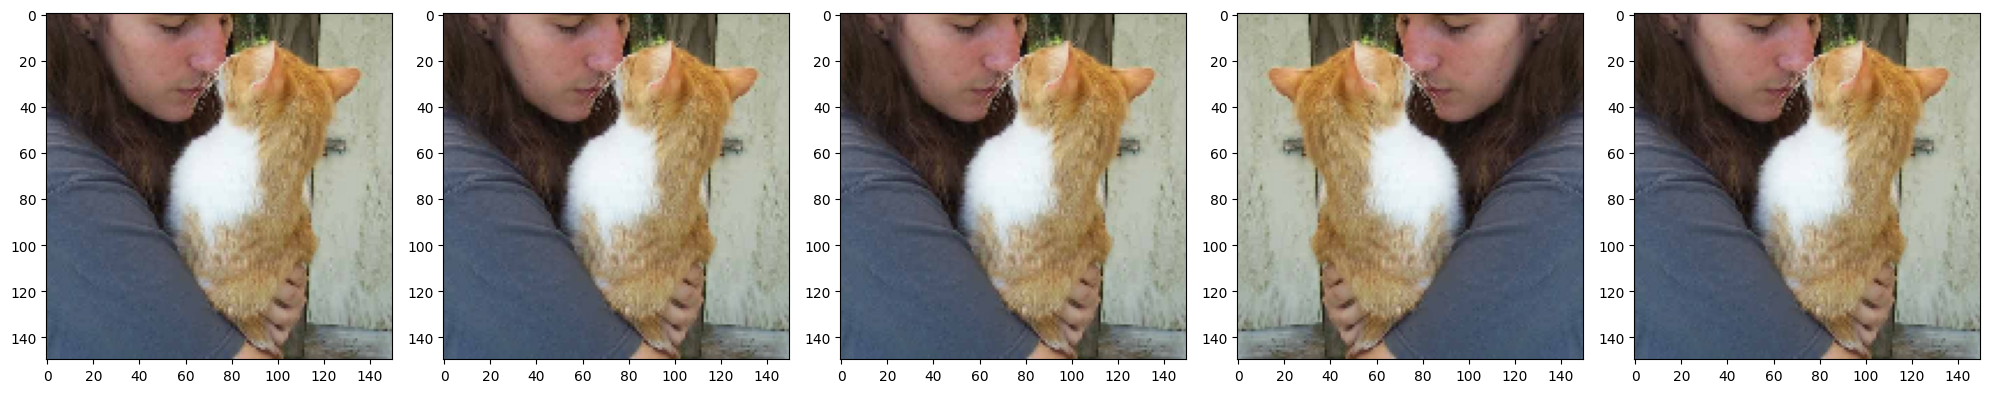

In [10]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
PlotImages(augmented_images)

In [11]:
# 2. Rotating Images

image_gen = ImageDataGenerator(rescale = 1./255, rotation_range = 45)
train_data_gen = image_gen.flow_from_directory(batch_size = BATCH_SIZE, directory = train_dir,shuffle = True, target_size = (IMG_SHAPE, IMG_SHAPE))

Found 2000 images belonging to 2 classes.


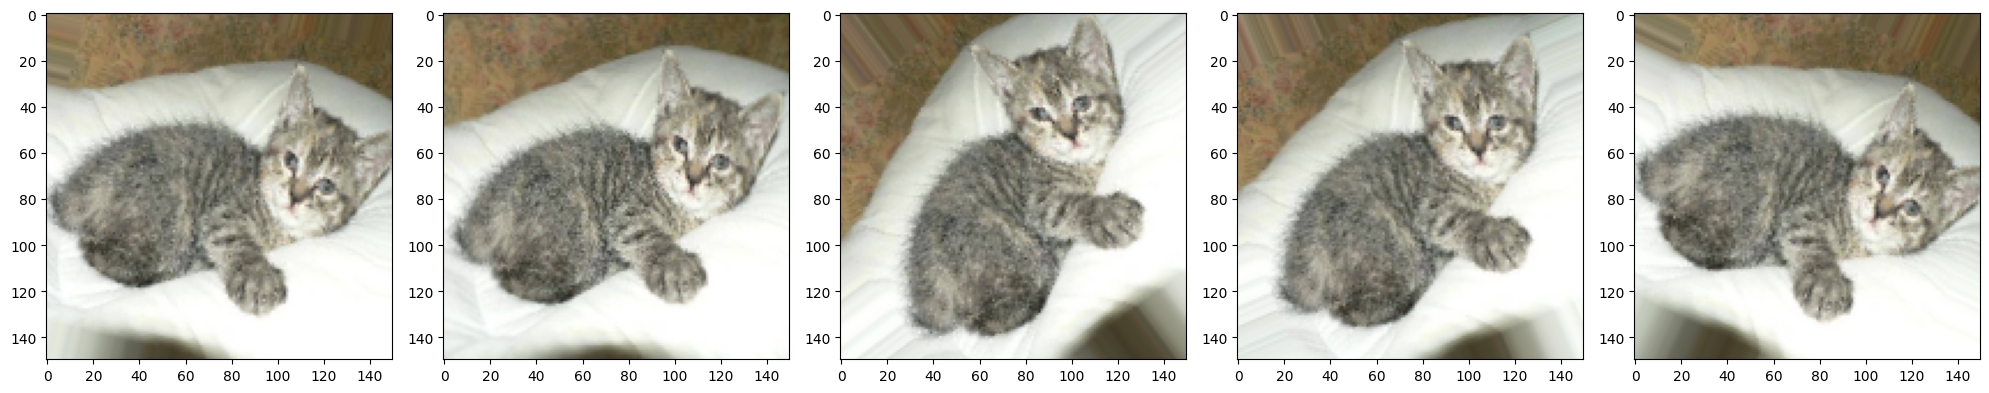

In [13]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
PlotImages(augmented_images)

In [14]:
# 3. Zooming

image_gen = ImageDataGenerator(rescale = 1./255, zoom_range = 0.5)
train_data_gen = image_gen.flow_from_directory(batch_size = BATCH_SIZE, directory = train_dir, shuffle = True, target_size = (IMG_SHAPE, IMG_SHAPE))

Found 2000 images belonging to 2 classes.


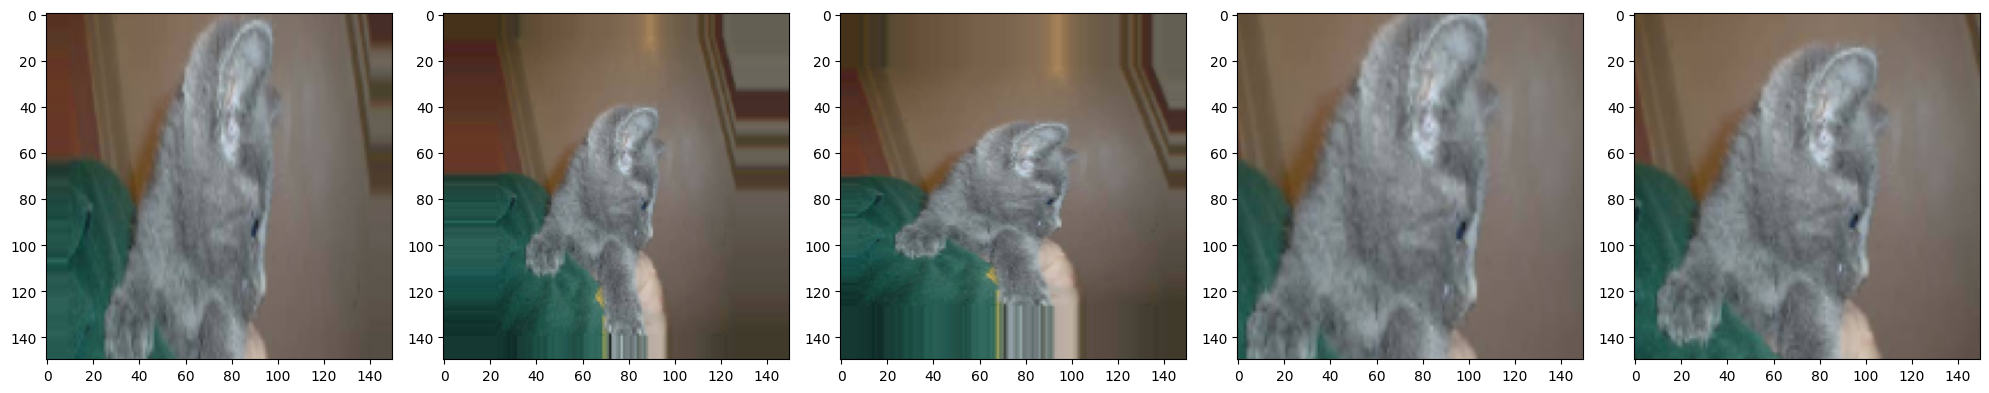

In [15]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
PlotImages(augmented_images)

In [16]:
# Applying a combination of all to the train dataset

image_gen = ImageDataGenerator(rescale = 1./255, rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True, fill_mode = 'nearest')
train_data_gen = image_gen.flow_from_directory(batch_size = BATCH_SIZE, directory = train_dir, shuffle = True, target_size = (IMG_SHAPE, IMG_SHAPE), class_mode = 'binary')

Found 2000 images belonging to 2 classes.


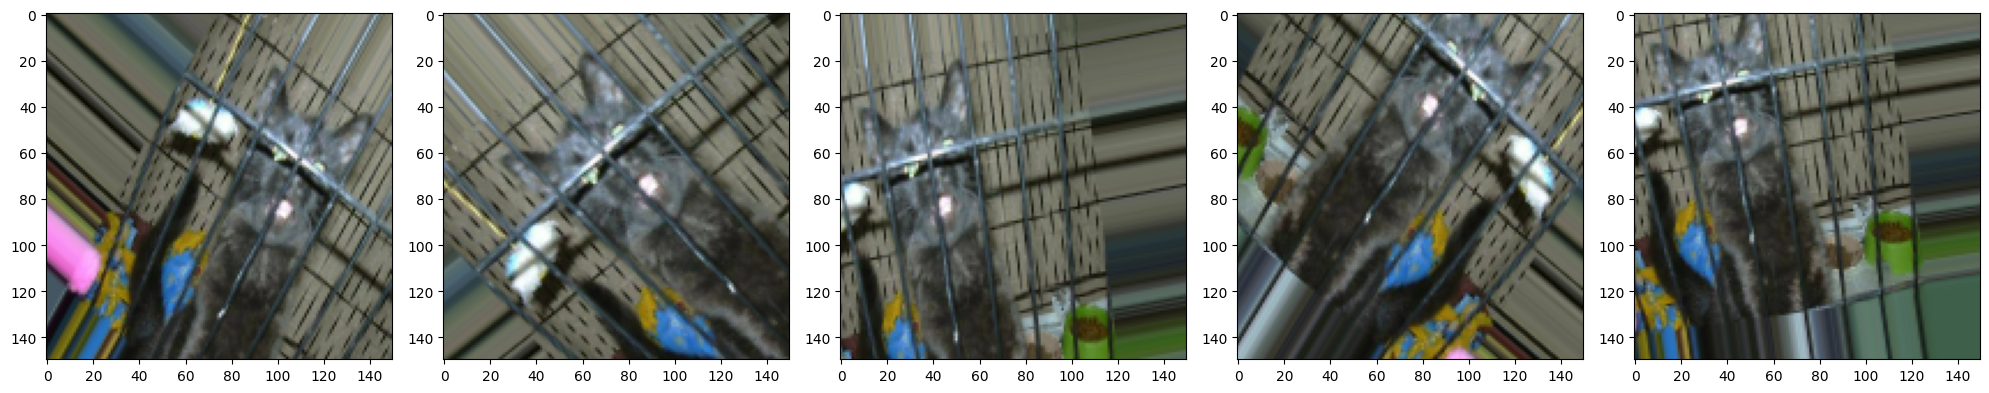

In [17]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
PlotImages(augmented_images)

In [18]:
# Creating Validation Data

image_gen = ImageDataGenerator(rescale = 1./255, rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True, fill_mode = 'nearest')
val_data_gen = image_gen.flow_from_directory(batch_size = BATCH_SIZE, directory = val_data, shuffle = True, target_size = (IMG_SHAPE, IMG_SHAPE), class_mode = 'binary')

Found 1000 images belonging to 2 classes.


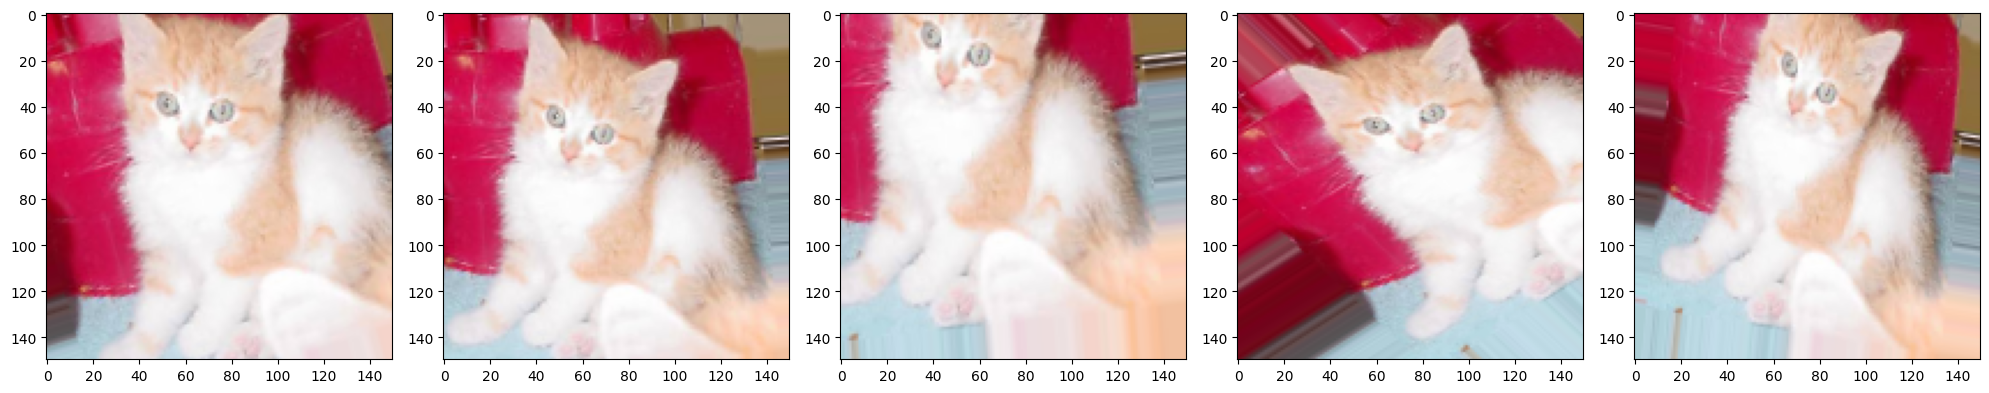

In [19]:
augmented_images = [val_data_gen[0][0][0] for i in range(5)]
PlotImages(augmented_images)

MODEL

In [20]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(2)
])

c:\Users\Arnav\Desktop\CNN\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,634 (13.17 MB)

 Trainable params: 3,453,634 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# Training the Model

try:
    mdl = model.fit(
        train_data_gen,
        steps_per_epoch = int(np.ceil(total_train / float(BATCH_SIZE))),
        epochs = EPOCHS,
        validation_data = val_data_gen,
        validation_steps = int(np.ceil(total_val / float(BATCH_SIZE)))
    )
except AttributeError as e:
    print("\nError Details: ", e)

c:\Users\Arnav\Desktop\CNN\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 985ms/step - accuracy: 0.4840 - loss: 0.7484 - val_accuracy: 0.5000 - val_loss: 0.6918
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/100


C:\Users\Arnav\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 681ms/step - accuracy: 0.5156 - loss: 0.6909 - val_accuracy: 0.5530 - val_loss: 0.6878
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 676ms/step - accuracy: 0.5770 - loss: 0.6800 - val_accuracy: 0.6420 - val_loss: 0.6377
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 676ms/step - accuracy: 0.5885 - loss: 0.6637 - val_accuracy: 0.5450 - val_loss: 0.6853
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 679ms/step - accuracy: 0.5684 - loss: 0.6803 - val_accuracy: 0.6560 - val_loss: 0.6354
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 680ms/step - accuracy: 0.6127 - loss: 0.6536 - val_accuracy: 0.6480

In [44]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Get the data from model history
acc = mdl.history.get('accuracy', [])
val_acc = mdl.history.get('val_accuracy', [])
loss = mdl.history.get('loss', [])
val_loss = mdl.history.get('val_loss', [])

# Arranging the length of all arrays
min_len = min(len(acc), len(val_acc), len(loss), len(val_loss))

acc = acc[:min_len]
val_acc = val_acc[:min_len]
loss = loss[:min_len]
val_loss = val_loss[:min_len]

epochs_range = list(range(min_len))

# Create subplots for accuracy and loss
fig = make_subplots(rows=1, cols=2, subplot_titles=('Training and Validation Accuracy', 'Training and Validation Loss'))

# Accuracy plot
fig.add_trace(go.Scatter(x=epochs_range, y=acc, mode='lines', name='Training Accuracy', line=dict(color='blue')), row=1, col=1)
fig.add_trace(go.Scatter(x=epochs_range, y=val_acc, mode='lines', name='Validation Accuracy', line=dict(color='orange')), row=1, col=1)

# Loss plot
fig.add_trace(go.Scatter(x=epochs_range, y=loss, mode='lines', name='Training Loss', line=dict(color='red')), row=1, col=2)
fig.add_trace(go.Scatter(x=epochs_range, y=val_loss, mode='lines', name='Validation Loss', line=dict(color='green')), row=1, col=2)

# Update layout for better appearance
fig.update_layout(title_text='Training and Validation Metrics', height=600, width=1000, showlegend=True)

# Display the plot
fig.show()
